# Домашнее задание: Классификация на Titanic

В этом задании вы будете работать с датасетом Titanic (можно загрузить через `seaborn.load_dataset('titanic')` или с Kaggle). Цель — обучить классификаторы и научиться интерпретировать результаты моделей.

**Модели:** Logistic Regression, SVM, kNN, Decision Tree.

**Целевая переменная:** `Survived`


### Задание 1 - смотрим на датасет (0.5 б)
Загрузите датасет, выведите его форму, типы данных, количество пропусков и уникальные значения по колонкам.

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
df = pd.read_csv(url)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Форма датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())
print("\nКоличество уникальных значений:")
print(df.nunique())

Форма датасета: (891, 11)

Типы данных:
survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

Количество пропущенных значений:
survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Количество уникальных значений:
survived      2
pclass        3
name        891
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64


### Задание 2 - работаем с признаками (0.5 б)

Удалите ненужные признаки (`Name`, `Ticket`, `Cabin`). Обработайте пропуски и закодируйте категориальные признаки (`Sex`, `Embarked`, `Pclass`, и т.п.).

In [ ]:
df.drop(columns=['name', 'ticket', 'cabin'], inplace=True, errors='ignore')

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['embarked', 'pclass'], drop_first=True)

df.head()

,survived,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,0,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False
2,1,1,26.0,0,0,7.9250,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,True,False,False
4,0,0,35.0,0,0,8.0500,False,True,False,True


### Задание 3 - выбираем целевую переменную (1 б)

Целевая переменная — `survived`. Нарисуйте графики:
 - зависимости целевой переменной от признака `sex` (или `sex_male`)
 - зависимости целевой переменной от признака `pclass`
 - зависимости целевой переменной от признака `sibsp`

Прокомментируйте каждый график

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

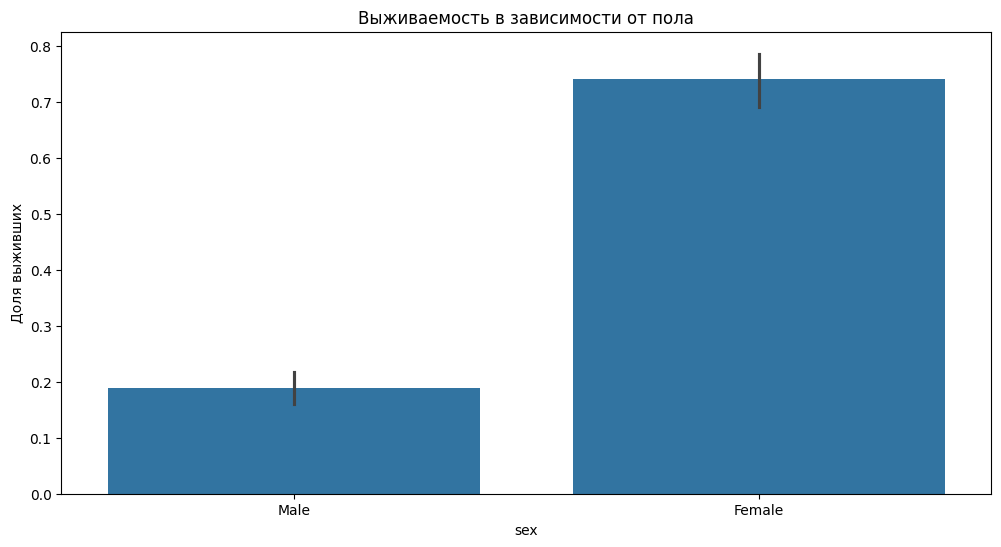

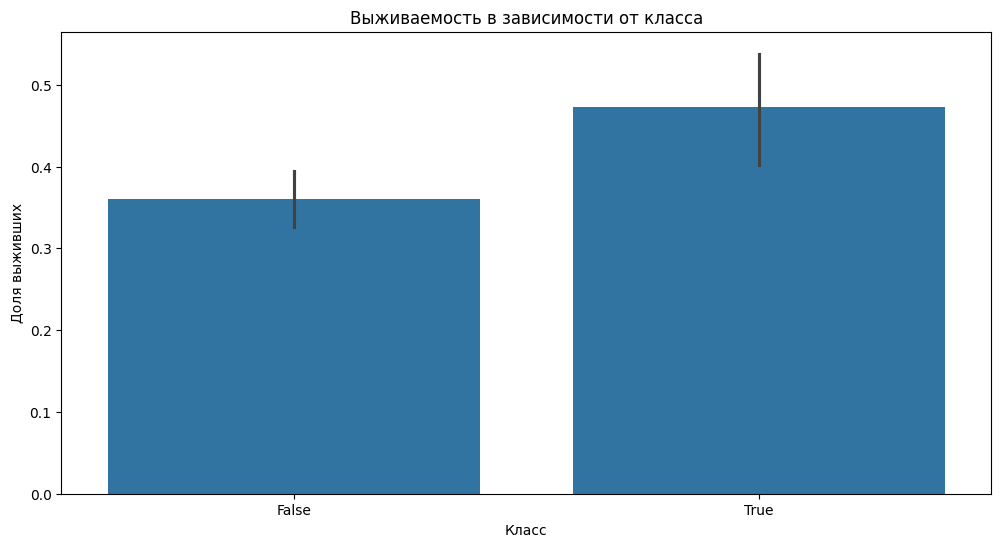

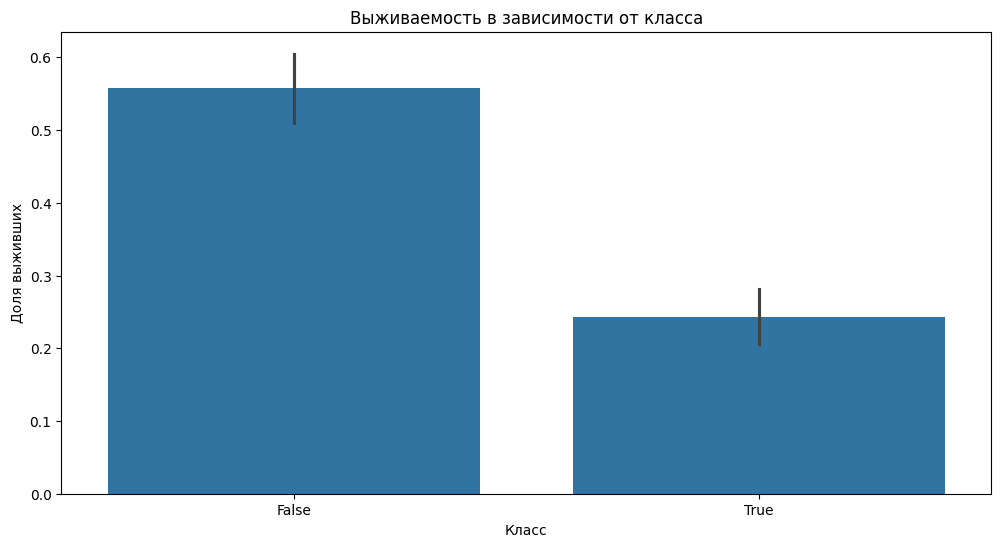

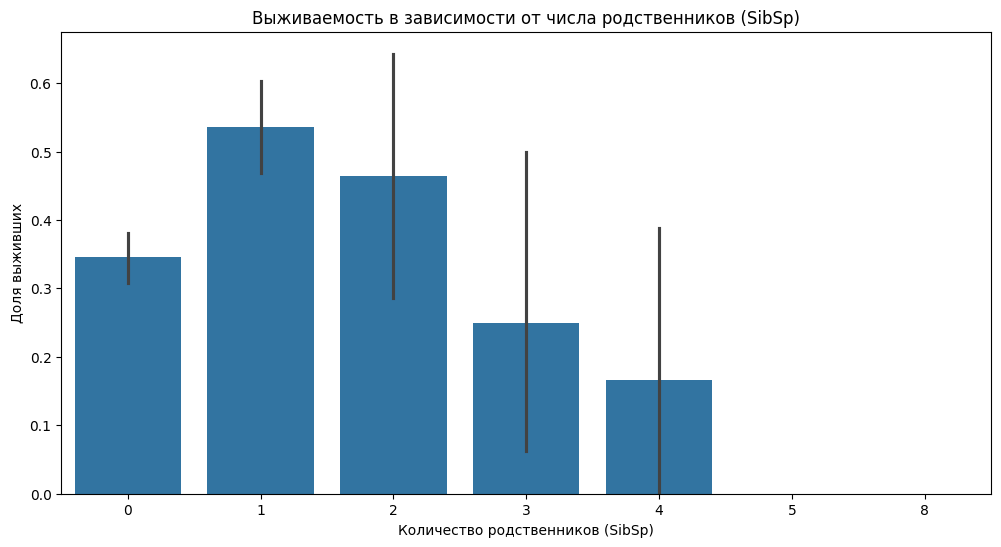

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='survived', data=df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Выживаемость в зависимости от пола')
plt.ylabel('Доля выживших')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='pclass_2', y='survived', data=df)
plt.title('Выживаемость в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Доля выживших')
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x='pclass_3', y='survived', data=df)
plt.title('Выживаемость в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Доля выживших')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='sibsp', y='survived', data=df)
plt.title('Выживаемость в зависимости от числа родственников (SibSp)')
plt.xlabel('Количество родственников (SibSp)')
plt.ylabel('Доля выживших')
plt.show()

Разделите данные на фичи и таргет.

In [ ]:
X = df.drop(columns=['survived'])
y = df['survived']

### Задание 4 - делим выборку на обучение и тест (1 б)

Разделите выборку на train/test (70/30). Не забудьте сделать так, чтобы в трейн и тест попало примерно одинаковое количество наблюдений 0 и 1 классов.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
  )

Нарисуйте получившееся распределение классов на трейне и на тесте

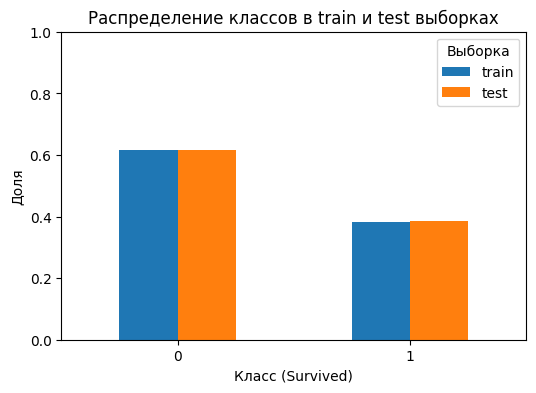

In [ ]:
train_dist = y_train.value_counts(normalize=True).rename('train')
test_dist = y_test.value_counts(normalize=True).rename('test')

dist_df = pd.concat([train_dist, test_dist], axis=1)

dist_df.plot(kind='bar', figsize=(6, 4))
plt.title('Распределение классов в train и test выборках')
plt.xlabel('Класс (Survived)')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.legend(title='Выборка')
plt.ylim(0, 1)
plt.show()

### Задание 5 - Logistic Regression (1 б)

  - Обучите модель логистической регрессии.
  - Выберите оптимальную метрику для решаемой задачи, обоснуйте свой выбор и выведите эту метрику на train и test.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f'Accuracy:\nTrain: {acc_train:.3f}, Test: {acc_test:.3f}')
print(f'F1-score:\nTrain: {f1_train:.3f}, Test: {f1_test:.3f}')

Accuracy:
Train: 0.811, Test: 0.795
F1-score:
Train: 0.739, Test: 0.724


In [ ]:
from sklearn.metrics import classification_report
print('Classification report (Train):')
print(classification_report(y_train, y_train_pred, digits=3))

print('Classification report (Test):')
print(classification_report(y_test, y_test_pred, digits=3))

Classification report (Train):
              precision    recall  f1-score   support

           0      0.824     0.880     0.851       384
           1      0.784     0.699     0.739       239

    accuracy                          0.811       623
   macro avg      0.804     0.789     0.795       623
weighted avg      0.809     0.811     0.808       623

Classification report (Test):
              precision    recall  f1-score   support

           0      0.820     0.855     0.837       165
           1      0.750     0.699     0.724       103

    accuracy                          0.795       268
   macro avg      0.785     0.777     0.780       268
weighted avg      0.793     0.795     0.793       268



### Так как у нас не сильно выраженный дизбаланс классов, accuracy будет хорошей метрикой для оценки, также можно присмотреться к f1 score, т.к. баланс классов чуть смещен в сторону 0-го класса

### Задание 6 - SVM  (0.5 б)

Обучите модель SVM, сравните с результатами логистической регрессии.

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

In [ ]:
acc_train_svm = accuracy_score(y_train, y_train_pred_svm)
acc_test_svm = accuracy_score(y_test, y_test_pred_svm)

f1_train_svm = f1_score(y_train, y_train_pred_svm)
f1_test_svm = f1_score(y_test, y_test_pred_svm)


print(f'Accuracy:\nTrain: {acc_train_svm:.3f}, Test: {acc_test_svm:.3f}')
print(f'F1-score:\nTrain: {f1_train_svm:.3f}, Test: {f1_test_svm:.3f}')

### показывает худшие f1-score

Accuracy:
Train: 0.700, Test: 0.634
F1-score:
Train: 0.464, Test: 0.410


### Задание7 - Desicion Tree (3 б 1 + 2 доп)

Обучите дерево решений, визуализируйте его структуру. (1 б)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

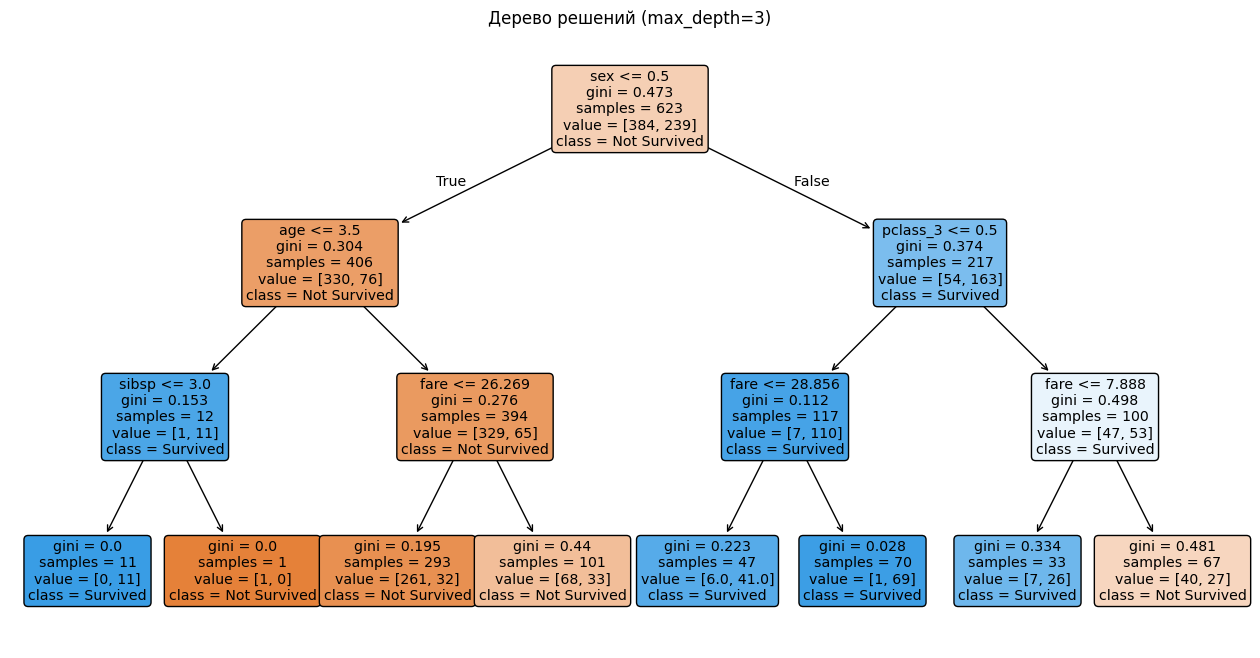

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True)
plt.title("Дерево решений (max_depth=3)")
plt.show()

Воспользуйтесь методом [feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) для определения важности признаков вашего дерева решений. Какие признаки оказались наиболее важными? Как можно интерпретировать модель для понимания факторов выживания? (2 б доп)

In [ ]:
importances = tree_model.feature_importances_
feature_names = X.columns

feat_importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': importances
}).sort_values(by='Важность', ascending=False)

print(feat_importance_df)

      Признак  Важность
0         sex  0.654352
8    pclass_3  0.131969
4        fare  0.104612
1         age  0.095730
2       sibsp  0.013336
3       parch  0.000000
5  embarked_Q  0.000000
6  embarked_S  0.000000
7    pclass_2  0.000000


In [ ]:
# Женщины выживали значительно чаще этот фактор часто самый важный
# Пассажиры 3 класса выживали реже влияет на вероятность выживания

# Женщина из 1 или 2 класса, купившая дорогой билет высокая вероятность выживания = ВЫВОД

### Задание 8 - GridSearchCV (1.5 б)

Найдите оптимальные параметры для `LogisticRegression` с помощью `GridSearchCV` с 7ю фолдами.
  - попробуйте параметры пять различных параметров для 'C' и 'penalty' = 'l2'. (1 б)
  - используйте выбранную вами метрику для оценки вашего GridSearch (параметр `scoring`) (0.5 б)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

log_reg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=7,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 7 folds for each of 5 candidates, totalling 35 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='f1', verbose=1)

### Задание 9 - Pipeline (1 б)

Постройте `Pipeline`, включающий любой способ масштабирования признаков и обучение SVM модели.

In [ ]:
from sklearn.pipeline import Pipeline

svm_pipeline = Pipeline([
    ('svm', SVC(kernel='rbf', C=1.0, random_state=42))
])

svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('svm', SVC(random_state=42))])

### Задание 10 - сравнение моделей (1 б)

Постройте `classification report` для ваших моделей. Какой алгоритм лучше и почему?

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Ваш ответ здесь

### Задание 11 - kNN (3 б)

Постройте `Pipeline` для выбора `kNN` модели. Используйте стандартизацию для масштабирования признаков. С помощью `GridSearchCV` c 5ю фолдами найдите оптимальный `k` и метрику подсчета расстояния до соседей. Переберите не менее 5ти значений `k` и 2ух `metric`. На каких параметрах модель показала лучшее качество по выбранной вами метрике?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Ваш код здесь

### Задание 12 - AUC-ROC (2 б)

Постройте ROC-кривые для лучше модели каждого вида и вычислите AUC. Почему AUC важна при дисбалансе классов?

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# Ваш код здесь

In [ ]:
# Ваш ответ здесь